How to compute drawdown on an investment

In today’s issue, I’m going to show you how to compute the drawdown of the SPY ETF with Python.

Drawdown is the maximum decline from peak to trough during a specific period before a new peak is reached. Every trading strategy experiences drawdowns. Computing it helps you compare the relative riskiness between assets or strategies.

Unfortunately, most people don’t consider drawdown when managing their investments. Or if they do, struggle to compute it.

Today I’m going to walk you through it step by step.

In [1]:
import yfinance as yf
import numpy as np

In [2]:
# Download the data
data = yf.download("SPY", start="2020-01-01", end="2023-03-31")
returns = data["Adj Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

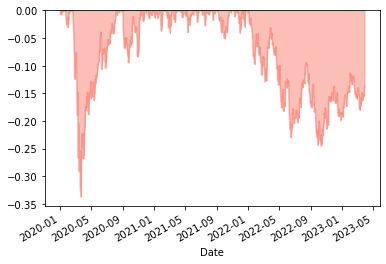

In [3]:
# Compute the drawdown
def drawdown(returns):
    """Determines the drawdown

    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative

    Returns
    -------
    drawdown : pd.Series

    """

    # replace the first nan value with 0.0
    returns.fillna(0.0, inplace=True)

    # create cumulative returns
    cumulative = (returns + 1).cumprod()

    # np.maximum.accumulate takes the running max value
    # of the input series. in this case, it will maintain
    # the running maximum value. this is the running
    # maximum return
    running_max = np.maximum.accumulate(cumulative)

    # compute the change between the cumulative return
    # and the running maximum return
    return (cumulative - running_max) / running_max

drawdown(returns).plot(kind="area", color="salmon", alpha=0.5)

<AxesSubplot:xlabel='Date'>

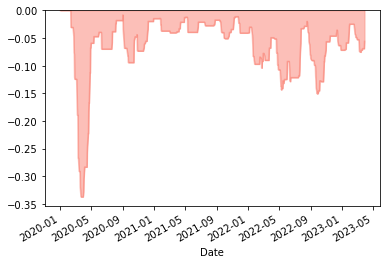

In [5]:
# Compute the maximum drawdown
def max_drawdown(returns):
    """ Determines the maximum drawdown

    Parameters
    ----------
    returns : pd.Series
        Daily returns of an asset, noncumulative

    Returns
    -------
    max_drawdown : float

    """

    return np.min(drawdown(returns))

returns.rolling(30).apply(max_drawdown).plot(kind="area", color="salmon", alpha=0.5)

Drawdown and max drawdown focus on capital preservation. It’s a useful indicator of the riskiness of a stock, portfolio, or strategy. Use it to help manage your risk.